In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import itertools
import time

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

# Load data

In [3]:
#load train data
train_df = None
with open("./pickles_dataset/ins","rb") as f:
    train_df = pickle.load(f)
train_df = pd.DataFrame(train_df.to_numpy(), columns=["harmonic", "avg_zcr", "mfcc", "spectrum", "chroma", "contrast", "label"])
train_df.shape

(247603, 7)

In [4]:
validate_df = None
test_df = None
with open("./pickles_dataset/validate_test","rb") as f:
    validate_df,test_df = pickle.load(f)[1:]

In [5]:
validate_df.head()

,harmonic,avg_zcr,mfcc,spectrum,chroma,contrast,label
0,1,5031.50,"[-535.4764, 17.633451, -8.123249, -2.7077072, ...","[5.463147, 1.3351943, 0.36588892, 0.13094205, ...","[0.3383932997707979, 0.3398472017526861, 0.292...","[14.358437349542552, 10.190564485645842, 12.72...",bass
1,1,5031.50,"[-535.4764, 17.633451, -8.123249, -2.7077072, ...","[5.463147, 1.3351943, 0.36588892, 0.13094205, ...","[0.3383932997707979, 0.3398472017526861, 0.292...","[14.358437349542552, 10.190564485645842, 12.72...",bass
2,1,5164.25,"[-493.03162, 7.96893, 0.8473228, 0.800229, 1.6...","[7.5631676, 1.2464981, 0.36058328, 0.08619505,...","[0.3347271133111964, 0.33364837659130264, 0.32...","[14.778606613240672, 10.106587615734268, 12.51...",bass
3,1,10627.00,"[-625.30145, 8.871383, 0.96031183, 1.6292825, ...","[2.0140505, 1.1537521, 0.6858305, 0.22633953, ...","[0.3008934638642338, 0.3462078139274258, 0.315...","[10.891723983341487, 9.859316645769365, 11.076...",bass
4,0,1445.75,"[-521.4492, 66.55492, 57.83267, 52.418274, 47....","[141.28351, 17.761057, 0.44077566, 0.23206188,...","[0.30224226585417413, 0.09514178121099975, 0.0...","[22.130566667445347, 20.483482335026686, 13.68...",bass


In [6]:
test_df.head()

,harmonic,avg_zcr,mfcc,spectrum,chroma,contrast,label
0,1,9862.25,"[-611.59204, 8.302415, 1.4800584, 1.61807, 1.4...","[1.8699579, 0.9339182, 0.5286996, 0.1616991, 0...","[0.34618396258302225, 0.3339795956968957, 0.26...","[13.982070590406298, 10.516676651835365, 12.27...",bass
1,0,5164.00,"[-566.9507, 24.196726, -14.577452, -3.473292, ...","[2.1836581, 2.896149, 0.7850763, 0.04999076, 0...","[0.3170853569740402, 0.288775985611145, 0.2553...","[14.4742135544046, 10.000377824064474, 12.6269...",bass
2,1,1093.25,"[-527.4598, 62.276005, 54.616714, 50.009815, 4...","[117.31119, 14.734233, 0.3937067, 0.20285791, ...","[0.17532674694803424, 0.0652075310459326, 0.02...","[22.647336730987067, 18.315292192948878, 14.22...",bass
3,0,900.25,"[-522.5492, 67.51859, 57.217327, 50.570675, 44...","[113.081535, 19.814451, 0.9229793, 0.54119885,...","[0.14917230483446214, 0.09082857351249589, 0.0...","[22.49362659109897, 18.333520738287724, 14.297...",bass
4,0,1832.75,"[-520.88574, 68.12242, 59.05006, 53.027615, 47...","[135.00192, 21.250662, 0.6068801, 0.26751035, ...","[0.725127736345901, 0.14230490421468073, 0.058...","[26.1339641394499, 20.43768688775763, 14.96288...",bass


In [13]:
dataset_df = (validate_df + test_df) 
dataset_df.shape

(12678, 7)

# Visualize

# Preprocessing

In [14]:
#function to get features
def get_features_vector(df):
    res = []
    mfcc_scaled = scaler.fit_transform(list(df.mfcc))
    contrast_scaled = scaler.fit_transform(list(df.contrast))
    avg_zcr_scaled = scaler.fit_transform(df.avg_zcr.to_numpy().reshape(-1,1))
    for i in range(df.shape[0]):
        temp = list(avg_zcr_scaled[i]) + list(mfcc_scaled[i]) + list(contrast_scaled[i])
        res.append(temp)
    return res

In [15]:
#Label encoder
label_encoder = LabelEncoder()
label_encoder.fit(train_df.label)
train_label = label_encoder.fit_transform(train_df.label)
validate_label = label_encoder.fit_transform(validate_df.label)
test_label = label_encoder.fit_transform(test_df.label)

In [16]:
#decide which features to use

In [17]:
# get scaled features vector
scaler = StandardScaler()
train_features = get_features_vector(train_df)
validate_features = get_features_vector(validate_df)
test_features = get_features_vector(test_df)

In [18]:
from sklearn.model_selection import cross_val_score
k = list(range(1,11))
knn = KNeighborsClassifier(n_neighbors=1)
#mfcc
mfcc = test_df.mfcc.to_numpy().tolist()
scaled_mfcc = scaler.fit_transform(mfcc)
score1 = cross_val_score(knn, scaled_mfcc, test_label, cv = 10)
#spectrogram
spectrum = test_df.spectrum.to_numpy().tolist()
scaled_spectrum = scaler.fit_transform(spectrum)
score2 = cross_val_score(knn, scaled_spectrum, test_label, cv = 10)
#chroma
chroma = test_df.chroma.to_numpy().tolist()
scaled_chroma = scaler.fit_transform(chroma)
score3 = cross_val_score(knn, scaled_chroma, test_label, cv = 10)
#contrast
contrast = test_df.contrast.to_numpy().tolist()
scaled_contrast = scaler.fit_transform(contrast)
score4 = cross_val_score(knn, scaled_contrast, test_label, cv = 10)

Text(0, 0.5, 'Accuracy')

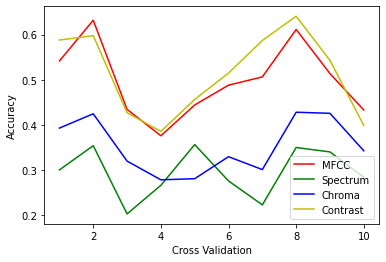

In [19]:
plt.plot(k, score1, 'r', k, score2, 'g', k, score3, 'b', k, score4, 'y')
plt.legend(['MFCC', 'Spectrum', 'Chroma', 'Contrast'])
plt.xlabel('Cross Validation')
plt.ylabel('Accuracy')

In [20]:
a = np.array(test_features)
a.shape

(4096, 21)

# Model selection and evaluation

# KNN

Text(0, 0.5, 'Accuracy')

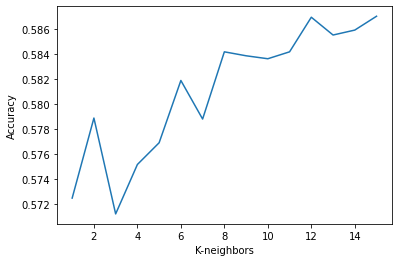

In [21]:
#knn with k in range fo 1 -> 10
k_range = list(range(1,16))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_features, train_label)
    predicted_label = knn.predict(validate_features)
    scores.append(accuracy_score(validate_label,predicted_label))
plt.plot(k_range, scores)
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')

In [24]:
total_train = train_features + validate_features
total_train_label = list(train_label) + list(validate_label)

In [28]:
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(total_train, total_train_label)
knn_predict = knn.predict(test_features)


In [29]:
print("Accuracy: %.2f  ," % accuracy_score(test_label, knn_predict,normalize=True), accuracy_score(test_label, knn_predict,normalize=False))

Accuracy: 0.91  , 3718


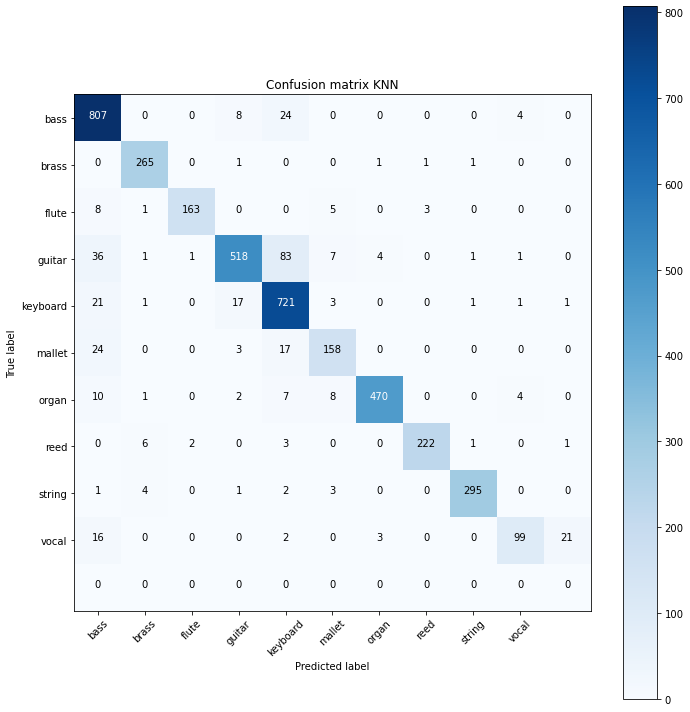

In [30]:
# ve confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(test_label, knn_predict)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_,
                      title='Confusion matrix KNN')

# SVM


In [31]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [ ]:
svc = SVC()
param_grid =  {'C': np.logspace(-2, 10, 13), 
                'gamma': np.logspace(-9, 3, 13)
              }
svc_grid = RandomizedSearchCV(svc, param_distributions = param_grid, cv = 10, verbose = True, n_jobs = -1)
best_clf_svc_rnd = svc_grid.fit(validate_features, validate_label)
clf_performance(best_clf_svc_rnd,'SVC')

In [51]:
svc = SVC(gamma=0.01, C= 1000000)
svc.fit(validate_features,validate_label)


SVC(C=1000000, gamma=0.01)

In [52]:
svm_predict = svc.predict(test_features)

In [53]:
print("Accuracy: %.2f  ," % accuracy_score(test_label, svm_predict,normalize=True), accuracy_score(test_label, svm_predict,normalize=False))

Accuracy: 0.99  , 4045


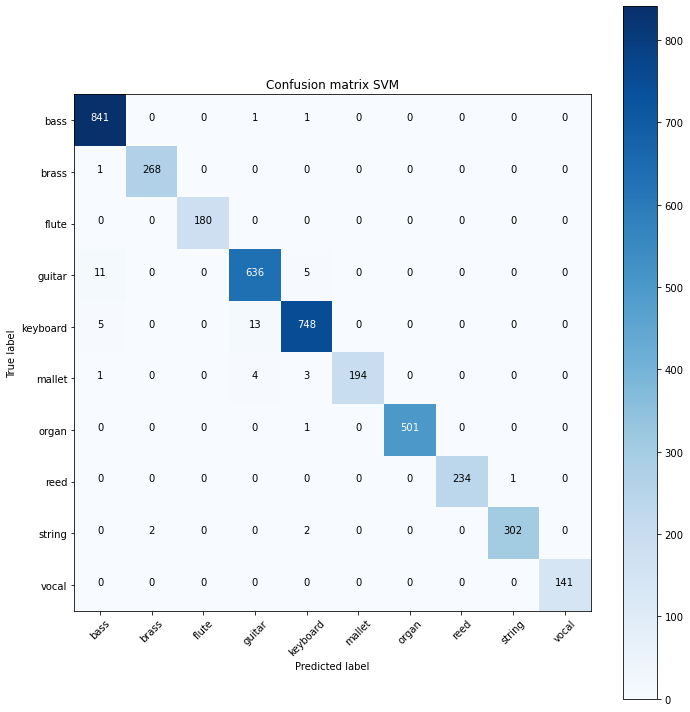

In [55]:
cnf_matrix = confusion_matrix(test_label, svm_predict)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_,
                      title='Confusion matrix SVM')

# Random Forest

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [100,500], 
                                  'max_depth': [10,20,50,None],
                                  'min_samples_leaf': [1,2,4],
                                  'min_samples_split': [2,5]}      
rf_grid = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf_rnd = rf_grid.fit(validate_features, validate_label)
clf_performance(best_clf_rf_rnd,'Random Forest')

In [56]:
rf = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, min_samples_split=5, max_depth=20)
rf.fit(validate_features, validate_label)
rf_predict = rf.predict(test_features)

In [57]:
print("Accuracy: %.2f  ," % accuracy_score(test_label, rf_predict,normalize=True), accuracy_score(test_label, rf_predict,normalize=False))

Accuracy: 0.99  , 4061


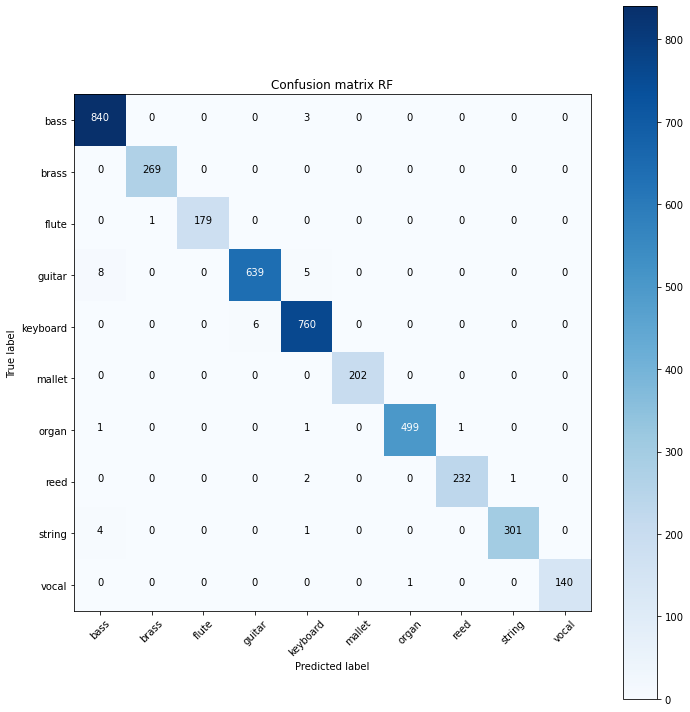

In [58]:
cnf_matrix = confusion_matrix(test_label, rf_predict)
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=label_encoder.classes_,
                      title='Confusion matrix RF')